# MonkeyType Data Report

## Import Statements

In [221]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


 # NOTE: Import statements for the machine learning libraries will happen as I go because those tend to only be used for one code cell

In this report, I will be analyzing typing data from the website I take my typing tests which is [MonkeyType](https://monkeytype.com/). This is really nice because I have been doing typing tests since the beginning of the year. Since I am at my computer typing lots of code and math proofs, it's important to me that I increase my typing speed. This will mean I complete assignments faster and I get more time back in my pocket that I can use in other places. 

Unfortunately, MonkeyType does not let you download your data very easily. In order for me to get all of my typing data. As such, if you are interested in downloading your own typing data from MonkeyType, this is how I learned to do it:

> **How to Download your Typing Data from MonkeyType**
> 1. Go to your accounts page where you can view all your stats on the website
> 2. Open your console, most web browsers can do this by pressing F12 and then clicking on "Console"
> 3. Type the command `copy(snapshot().results)`. This will copy all of your data since the creation of your account to the clipboard.
> 4. Create a new text document and paste your data. It should be a LOT of lines. Save this text document with the `.json` extension. 


This means that I have one singular but HUGE json file where all of my data is stored.

## Stakeholders

There are a few stakeholders that I think are important when addressing this project:

### Myself

I've been typing for so long and it's cool for me to look back and see the journey that I have had with typing. There's something satisfying to be said about going back and seeing your progress. 

### Other Typists

For similar reasons as stated above, other people in the typing community might be curious to see my progress charted over time. 

### Wanna-Be Typists

Seeing the progress that I have made just by doing 1-2 typing tests a day since the beginning of the year might encourage people who have slower typing speeds to want to put the work into getting better at typing. 


## Data Attributes

My dataset contains the following attributes:

* ID: Every test has a random string ID that can be used for identification
* WPM: Stands for "words per minute" - the words per minute that I got on that test
* Raw WPM: Typers make mistakes when they type, and mistakes are penalized in the calculation of WPM. The Raw WPM would be the WPM scored if mistakes were not taken into account
* acc: short for "accuracy", this score between 0 and 100 is the percent accurate I was on that test
* mode: whether this was a timed test, a quote test, or somet other form of test
* mode2: the value heree depends on the value in mode
    * IF TIMED TEST: mode2 displays the length of the test
    * IF QUOTE TEST: mode2 displays the number of characters in the quote
* quote length: a bit poorly named in my opinion. a 1 means that the test was a quote test, and a -1 means the test was not a quote test. Not sure what additional information this gives us...
* timestamp: the timestamp for when the test occurred
* restart count: how many times the test was restarted
* incomplete test seconds: the total number of seconds all incompleted tests took
* test duration: how long the test took. This is valuable if you got a quote because different quotes take various amounts of time
* afk duration: how many seconds there wsa no user input
* tags: an array of tags put on the test
* consistency: how consistent my typing speed remained over the course of the entire test (measured as a percentage)
* chart data: this is a JSON object containing information about my WPM, errors, and raw WPM at every second of my test
* uid: my user ID
* key spacing stats: these stats are measured in milliseconds and describe the time between each key press 
* key duration stats: these stats are measured in milliseconds and describe the time it took me to press a key
* ir: this column has been depracated since I started this project
* bailed out: Whether a test was cancelled near the end of a test
* blind mode: Whether blind mode was on/off
* lazy mode: Whether lazy mode was on/off
* difficulty: The difficulty level of the test
* funbox: What type of funbox was used in the test
* language: what language I typed in for that test
* numbers: True if numbers appeared on the test and false otherwise
* punctuation: True if punctuation appeared on the test and false otherwise
* is PB: 1 if the test was a PB at the time, otherwise left blank if there was no PB


## Data Cleaning/Aggregation

Since `pandas` conveniently has a `read_json` function, we can get the data into a DataFrame:

In [222]:
mt_df = pd.read_json('monkey_type_data.json')
mt_df.set_index('_id')

,wpm,rawWpm,charStats,acc,mode,mode2,quoteLength,timestamp,restartCount,incompleteTestSeconds,...,ir,bailedOut,blindMode,lazyMode,difficulty,funbox,language,numbers,punctuation,isPb
_id,,,,,,,,,,,,,,,,,,,,,
619be623425285ba199b5465,103.80,109.20,"[519, 7, 0, 3]",97.44,time,60,-1,2021-11-22 18:49:08.000,2,2.84,...,1.0,False,False,False,normal,none,english,False,False,NaN
619bdecb425285ba19784be8,102.98,110.38,"[515, 14, 2, 2]",94.31,time,60,-1,2021-11-22 18:17:48.000,0,0.00,...,1.0,False,False,False,normal,none,english,False,False,NaN
619bde01425285ba197279a1,109.38,116.18,"[547, 13, 2, 2]",95.72,time,60,-1,2021-11-22 18:14:26.000,0,0.00,...,1.0,False,False,False,normal,none,english,False,False,NaN
6171d251653e0be59fcc7d40,110.36,117.36,"[552, 9, 3, 1]",96.94,time,60,-1,2021-10-21 20:49:22.000,1,0.92,...,1.0,False,False,False,normal,none,english,False,False,NaN
6168fde0418b06c0ab798403,108.95,114.34,"[545, 9, 4, 3]",96.85,time,60,-1,2021-10-15 04:04:48.000,2,3.04,...,1.0,False,False,False,normal,none,english,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61182e7af039809de162d25a,82.80,86.40,"[414, 5]",94.65,time,60,-1,2021-01-12 07:14:52.479,0,0.00,...,NaN,False,False,False,normal,none,english,False,False,NaN
61182e7af039809de162d25b,79.19,80.19,"[396, 0]",97.82,time,60,-1,2021-01-12 07:11:25.369,0,0.00,...,NaN,False,False,False,normal,none,english,False,False,NaN
61182e7af039809de162d25c,85.00,87.00,"[425, 4]",96.20,time,60,-1,2021-01-05 04:04:28.898,0,0.00,...,NaN,False,False,False,normal,none,english,False,False,NaN


Initially looking at this data, there are many columns that are not useful to my data analysis. Namely the following:

* afk duration: Whenever I take typing tests, I never stop typing (otherwise what is the point in the typing test?). As such, a column of zeros don't really mean anything
* tags: I don't ever tag any of my tests, so this is just a column of empty lists.  
* uid: My user-ID never changes so it doesn't make sense to include this column
* ir: this column didn't make any sense to me. Wwhen I reached out to the developers, they couldn't tell me what that was either and removed the column
* bailed out: I've never gotten so far where I would 'bail out' so this column has useless information
* language: I only ever type in English
* chart data: this just gives me a play-by-play of wpm, raw wpm, and more at every possible second of testing. Since I only care about the final results to me, I'd rather not have a bunch of giant arrays of second-by-second plays clogging up my dataset
* funbox: I don't even know what this setting does for my typing tests. Considering that I've never messed with it, it doesn't seem like it would have any information that would be relevant to this project
* numbers: I never add numbers into my typing tests (although maybe I should!) so this column gives us no useful information
* difficulty: I didn't even know that it was possible to change the difficulty in settings. Since I didn't change the difficulty, this column presents no relevant information
* blindMode/lazyMode: I never turned these modes on in my typing tests so these columns give no relevant information
* punctuation: I never add punctuation into my typing tests (although maybe I should!) so this column gives no relevant information
* quoteLength: right now it's marked -1 if it was not a quote test and 1 if it was a quote test. This seems pointless because we already have a column that classifies the type of the test.
* mode2: gives the length of the test in seconds... but there is already a column that does that and is more accurate. It displays a different number for quote tests but since I barely did any quote tests I'm likely going to group data by the type of test and not use that data when doing my hypothesis tests so this column seems like it does not have information that I need

As such, the first thing I am going to do is delete these columns from my DataFrame since these columns give no relevant information:

In [223]:
mt_df.drop(columns=['mode2', 'quoteLength', 'afkDuration', 'tags', 'chartData', 'uid', 'ir', 'bailedOut', 'blindMode', 'lazyMode', 'difficulty', 'funbox', 'numbers', 'punctuation', 'language'], inplace=True)
mt_df.set_index('_id')

,wpm,rawWpm,charStats,acc,mode,timestamp,restartCount,incompleteTestSeconds,testDuration,consistency,keyConsistency,keySpacingStats,keyDurationStats,isPb
_id,,,,,,,,,,,,,,
619be623425285ba199b5465,103.80,109.20,"[519, 7, 0, 3]",97.44,time,2021-11-22 18:49:08.000,2,2.84,60.000,79.47,43.46,"{'average': 109.5, 'sd': 62.29}","{'average': 50.73, 'sd': 18.43}",NaN
619bdecb425285ba19784be8,102.98,110.38,"[515, 14, 2, 2]",94.31,time,2021-11-22 18:17:48.000,0,0.00,60.010,77.69,43.40,"{'average': 104.91, 'sd': 59.62}","{'average': 51.32, 'sd': 19.65}",NaN
619bde01425285ba197279a1,109.38,116.18,"[547, 13, 2, 2]",95.72,time,2021-11-22 18:14:26.000,0,0.00,60.010,82.12,46.18,"{'average': 102.25, 'sd': 55.15}","{'average': 52.63, 'sd': 19.39}",NaN
6171d251653e0be59fcc7d40,110.36,117.36,"[552, 9, 3, 1]",96.94,time,2021-10-21 20:49:22.000,1,0.92,60.020,82.15,46.35,"{'average': 101.89, 'sd': 54.78}","{'average': 51.35, 'sd': 19.92}",NaN
6168fde0418b06c0ab798403,108.95,114.34,"[545, 9, 4, 3]",96.85,time,2021-10-15 04:04:48.000,2,3.04,60.030,83.92,45.95,"{'average': 104.95, 'sd': 56.99}","{'average': 52.19, 'sd': 18.63}",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61182e7af039809de162d25a,82.80,86.40,"[414, 5]",94.65,time,2021-01-12 07:14:52.479,0,0.00,60.003,68.43,34.09,"{'average': 129.13, 'sd': 86.04}","{'average': 61.76, 'sd': 20.56}",NaN
61182e7af039809de162d25b,79.19,80.19,"[396, 0]",97.82,time,2021-01-12 07:11:25.369,0,0.00,60.011,70.34,23.59,"{'average': 142.02, 'sd': 111.5}","{'average': 62.63, 'sd': 21.04}",NaN
61182e7af039809de162d25c,85.00,87.00,"[425, 4]",96.20,time,2021-01-05 04:04:28.898,0,0.00,60.001,75.32,30.58,"{'average': 130.74, 'sd': 92.13}","{'average': 59.67, 'sd': 26.74}",NaN


The `_id` column is nice but it's just a random string of characters. Since I'm going to be plotting tests down the line, I would rather the ID for all tests just be integers from 1 to the number of rows in the dataframe.

In [224]:
for i in range(len(mt_df.index)):
    mt_df['_id'][i] = len(mt_df.index) - i

mt_df.set_index('_id')

<ipython-input-224-c8714bf8269c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mt_df['_id'][i] = len(mt_df.index) - i


,wpm,rawWpm,charStats,acc,mode,timestamp,restartCount,incompleteTestSeconds,testDuration,consistency,keyConsistency,keySpacingStats,keyDurationStats,isPb
_id,,,,,,,,,,,,,,
177,103.80,109.20,"[519, 7, 0, 3]",97.44,time,2021-11-22 18:49:08.000,2,2.84,60.000,79.47,43.46,"{'average': 109.5, 'sd': 62.29}","{'average': 50.73, 'sd': 18.43}",NaN
176,102.98,110.38,"[515, 14, 2, 2]",94.31,time,2021-11-22 18:17:48.000,0,0.00,60.010,77.69,43.40,"{'average': 104.91, 'sd': 59.62}","{'average': 51.32, 'sd': 19.65}",NaN
175,109.38,116.18,"[547, 13, 2, 2]",95.72,time,2021-11-22 18:14:26.000,0,0.00,60.010,82.12,46.18,"{'average': 102.25, 'sd': 55.15}","{'average': 52.63, 'sd': 19.39}",NaN
174,110.36,117.36,"[552, 9, 3, 1]",96.94,time,2021-10-21 20:49:22.000,1,0.92,60.020,82.15,46.35,"{'average': 101.89, 'sd': 54.78}","{'average': 51.35, 'sd': 19.92}",NaN
173,108.95,114.34,"[545, 9, 4, 3]",96.85,time,2021-10-15 04:04:48.000,2,3.04,60.030,83.92,45.95,"{'average': 104.95, 'sd': 56.99}","{'average': 52.19, 'sd': 18.63}",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,82.80,86.40,"[414, 5]",94.65,time,2021-01-12 07:14:52.479,0,0.00,60.003,68.43,34.09,"{'average': 129.13, 'sd': 86.04}","{'average': 61.76, 'sd': 20.56}",NaN
4,79.19,80.19,"[396, 0]",97.82,time,2021-01-12 07:11:25.369,0,0.00,60.011,70.34,23.59,"{'average': 142.02, 'sd': 111.5}","{'average': 62.63, 'sd': 21.04}",NaN
3,85.00,87.00,"[425, 4]",96.20,time,2021-01-05 04:04:28.898,0,0.00,60.001,75.32,30.58,"{'average': 130.74, 'sd': 92.13}","{'average': 59.67, 'sd': 26.74}",NaN


The next line of business it to deal with the `isPB` column. The way that this was structured when reading in the data, a 1.0 was placed to indicate that the run was indeed a PB. If the run was not a PB, there was a missing value. To clean up the missing values in this column, I am going to put a 0 for every `NaN` value and a 1 otherwise.

In [225]:
# This cell cleans the isPb column of the DataFrame

mt_df['isPb'].fillna(0, inplace=True)
mt_df['isPb'] = mt_df['isPb'].astype(int)
mt_df.set_index('_id')

,wpm,rawWpm,charStats,acc,mode,timestamp,restartCount,incompleteTestSeconds,testDuration,consistency,keyConsistency,keySpacingStats,keyDurationStats,isPb
_id,,,,,,,,,,,,,,
177,103.80,109.20,"[519, 7, 0, 3]",97.44,time,2021-11-22 18:49:08.000,2,2.84,60.000,79.47,43.46,"{'average': 109.5, 'sd': 62.29}","{'average': 50.73, 'sd': 18.43}",0
176,102.98,110.38,"[515, 14, 2, 2]",94.31,time,2021-11-22 18:17:48.000,0,0.00,60.010,77.69,43.40,"{'average': 104.91, 'sd': 59.62}","{'average': 51.32, 'sd': 19.65}",0
175,109.38,116.18,"[547, 13, 2, 2]",95.72,time,2021-11-22 18:14:26.000,0,0.00,60.010,82.12,46.18,"{'average': 102.25, 'sd': 55.15}","{'average': 52.63, 'sd': 19.39}",0
174,110.36,117.36,"[552, 9, 3, 1]",96.94,time,2021-10-21 20:49:22.000,1,0.92,60.020,82.15,46.35,"{'average': 101.89, 'sd': 54.78}","{'average': 51.35, 'sd': 19.92}",0
173,108.95,114.34,"[545, 9, 4, 3]",96.85,time,2021-10-15 04:04:48.000,2,3.04,60.030,83.92,45.95,"{'average': 104.95, 'sd': 56.99}","{'average': 52.19, 'sd': 18.63}",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,82.80,86.40,"[414, 5]",94.65,time,2021-01-12 07:14:52.479,0,0.00,60.003,68.43,34.09,"{'average': 129.13, 'sd': 86.04}","{'average': 61.76, 'sd': 20.56}",0
4,79.19,80.19,"[396, 0]",97.82,time,2021-01-12 07:11:25.369,0,0.00,60.011,70.34,23.59,"{'average': 142.02, 'sd': 111.5}","{'average': 62.63, 'sd': 21.04}",0
3,85.00,87.00,"[425, 4]",96.20,time,2021-01-05 04:04:28.898,0,0.00,60.001,75.32,30.58,"{'average': 130.74, 'sd': 92.13}","{'average': 59.67, 'sd': 26.74}",0


Finally, there is a lot of data that is still hiding inside of arrays/dictionaries. I would like to be able to pull this data out of their arrays and into their own columns so that it is easier to understand and visualize all of the data.

The first column where this is somewhat of an issue is the charStats column. This contains an array of information. However, the website got an update while I was taking these typing tests and added more data. Since barely any of my tests from this dataset had this update and the added information is not as important, I am only going to keep the first two numbers from that array. The first value is the number of characters I typed correctly in the test and the second value is the number of characters I typed incorrectly during the test.

In this next code cell, I expand out these values into their own columns which are appended to the end of the `mt_df` DataFrame.

In [226]:
num_correct = []
num_incorrect = []

for index in mt_df.index:
    num_correct.append(mt_df['charStats'][index][0])
    num_incorrect.append(mt_df['charStats'][index][1])

mt_df.drop(columns=['charStats'], inplace=True)

mt_df['NumCorrectChars'] = num_correct
mt_df['NumIncorrectChars'] = num_incorrect
mt_df.set_index('_id')

,wpm,rawWpm,acc,mode,timestamp,restartCount,incompleteTestSeconds,testDuration,consistency,keyConsistency,keySpacingStats,keyDurationStats,isPb,NumCorrectChars,NumIncorrectChars
_id,,,,,,,,,,,,,,,
177,103.80,109.20,97.44,time,2021-11-22 18:49:08.000,2,2.84,60.000,79.47,43.46,"{'average': 109.5, 'sd': 62.29}","{'average': 50.73, 'sd': 18.43}",0,519,7
176,102.98,110.38,94.31,time,2021-11-22 18:17:48.000,0,0.00,60.010,77.69,43.40,"{'average': 104.91, 'sd': 59.62}","{'average': 51.32, 'sd': 19.65}",0,515,14
175,109.38,116.18,95.72,time,2021-11-22 18:14:26.000,0,0.00,60.010,82.12,46.18,"{'average': 102.25, 'sd': 55.15}","{'average': 52.63, 'sd': 19.39}",0,547,13
174,110.36,117.36,96.94,time,2021-10-21 20:49:22.000,1,0.92,60.020,82.15,46.35,"{'average': 101.89, 'sd': 54.78}","{'average': 51.35, 'sd': 19.92}",0,552,9
173,108.95,114.34,96.85,time,2021-10-15 04:04:48.000,2,3.04,60.030,83.92,45.95,"{'average': 104.95, 'sd': 56.99}","{'average': 52.19, 'sd': 18.63}",0,545,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,82.80,86.40,94.65,time,2021-01-12 07:14:52.479,0,0.00,60.003,68.43,34.09,"{'average': 129.13, 'sd': 86.04}","{'average': 61.76, 'sd': 20.56}",0,414,5
4,79.19,80.19,97.82,time,2021-01-12 07:11:25.369,0,0.00,60.011,70.34,23.59,"{'average': 142.02, 'sd': 111.5}","{'average': 62.63, 'sd': 21.04}",0,396,0
3,85.00,87.00,96.20,time,2021-01-05 04:04:28.898,0,0.00,60.001,75.32,30.58,"{'average': 130.74, 'sd': 92.13}","{'average': 59.67, 'sd': 26.74}",0,425,4


I now need to repeat this process for `keySpacingStats` and `keyDurationStats`. These are bit more complicated because they are stored in dictionaries. Since I know these dictionaries have only average and sd as keys, I will make a keys list and then use that list to index into the dictionaries from the `keySpacingStats` and `keyDurationStats` columns.

In [227]:
keys = ['average', 'sd']
key_spacing_avg = []
key_spacing_sd = []
key_duration_avg = []
key_duration_sd = []

for index in mt_df.index:
    key_spacing_dict = mt_df['keySpacingStats'][index]
    key_duration_dict = mt_df['keyDurationStats'][index]

    key_spacing_avg.append(key_spacing_dict[keys[0]])
    key_spacing_sd.append(key_spacing_dict[keys[1]])
    key_duration_avg.append(key_duration_dict[keys[0]])
    key_duration_sd.append(key_duration_dict[keys[1]])  


mt_df['KeySpacingAvg'] = key_spacing_avg
mt_df['KeySpacingSD'] = key_spacing_sd
mt_df['KeyDurationAvg'] = key_duration_avg
mt_df['KeyDurationSD'] = key_duration_sd

mt_df.drop(columns=['keySpacingStats', 'keyDurationStats'], inplace=True)

mt_df.set_index('_id')

,wpm,rawWpm,acc,mode,timestamp,restartCount,incompleteTestSeconds,testDuration,consistency,keyConsistency,isPb,NumCorrectChars,NumIncorrectChars,KeySpacingAvg,KeySpacingSD,KeyDurationAvg,KeyDurationSD
_id,,,,,,,,,,,,,,,,,
177,103.80,109.20,97.44,time,2021-11-22 18:49:08.000,2,2.84,60.000,79.47,43.46,0,519,7,109.50,62.29,50.73,18.43
176,102.98,110.38,94.31,time,2021-11-22 18:17:48.000,0,0.00,60.010,77.69,43.40,0,515,14,104.91,59.62,51.32,19.65
175,109.38,116.18,95.72,time,2021-11-22 18:14:26.000,0,0.00,60.010,82.12,46.18,0,547,13,102.25,55.15,52.63,19.39
174,110.36,117.36,96.94,time,2021-10-21 20:49:22.000,1,0.92,60.020,82.15,46.35,0,552,9,101.89,54.78,51.35,19.92
173,108.95,114.34,96.85,time,2021-10-15 04:04:48.000,2,3.04,60.030,83.92,45.95,0,545,9,104.95,56.99,52.19,18.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,82.80,86.40,94.65,time,2021-01-12 07:14:52.479,0,0.00,60.003,68.43,34.09,0,414,5,129.13,86.04,61.76,20.56
4,79.19,80.19,97.82,time,2021-01-12 07:11:25.369,0,0.00,60.011,70.34,23.59,0,396,0,142.02,111.50,62.63,21.04
3,85.00,87.00,96.20,time,2021-01-05 04:04:28.898,0,0.00,60.001,75.32,30.58,0,425,4,130.74,92.13,59.67,26.74


For the final step in cleaning up this data, I am going to reorder the columns so they look more presentable. Additionally, the data is sorted my timestamp, where the most *recent* tests are on the top. This is going to make charting weird because the data will be charted from most recent which will show opposite trends. As such, I will flip the entire dataset on it's head so that the data is sorted in the order the tests were taken.

In [228]:
mt_df = mt_df.reindex(columns=['_id', 'wpm', 'mode', 'acc', 'consistency', 'NumCorrectChars', 'NumIncorrectChars', 'KeySpacingAvg', 'KeySpacingSD', 'KeyDurationAvg', 'KeyDurationSD', 'restartCount', 'incompleteTestSeconds',  'timestamp', 'testDuration', 'keyConsistency',  'rawWpm', 'isPb'])

mt_df = mt_df[::-1]

mt_df.set_index('_id')

,wpm,mode,acc,consistency,NumCorrectChars,NumIncorrectChars,KeySpacingAvg,KeySpacingSD,KeyDurationAvg,KeyDurationSD,restartCount,incompleteTestSeconds,timestamp,testDuration,keyConsistency,rawWpm,isPb
_id,,,,,,,,,,,,,,,,,
1,82.60,time,97.01,68.49,413,3,134.88,105.63,61.46,27.33,0,0.00,2021-01-05 03:58:13.893,60.002,23.75,85.00,1
2,96.40,time,99.59,77.50,482,0,123.80,75.83,58.17,26.23,0,0.00,2021-01-05 04:01:56.171,60.003,39.16,96.40,1
3,85.00,time,96.20,75.32,425,4,130.74,92.13,59.67,26.74,0,0.00,2021-01-05 04:04:28.898,60.001,30.58,87.00,0
4,79.19,time,97.82,70.34,396,0,142.02,111.50,62.63,21.04,0,0.00,2021-01-12 07:11:25.369,60.011,23.59,80.19,0
5,82.80,time,94.65,68.43,414,5,129.13,86.04,61.76,20.56,0,0.00,2021-01-12 07:14:52.479,60.003,34.09,86.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,108.95,time,96.85,83.92,545,9,104.95,56.99,52.19,18.63,2,3.04,2021-10-15 04:04:48.000,60.030,45.95,114.34,0
174,110.36,time,96.94,82.15,552,9,101.89,54.78,51.35,19.92,1,0.92,2021-10-21 20:49:22.000,60.020,46.35,117.36,0
175,109.38,time,95.72,82.12,547,13,102.25,55.15,52.63,19.39,0,0.00,2021-11-22 18:14:26.000,60.010,46.18,116.18,0


## Faster Typer or No Game?

Before I get into any of the more specific attributes in the dataset, let's just see if my words per minute has improved over time. Below is a scatterplot of my words per minute across all of the tests that I have taken:

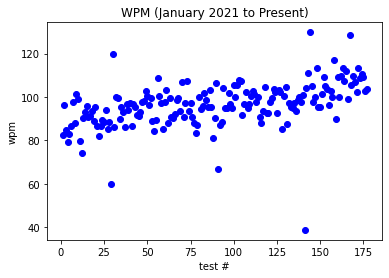

In [229]:
# code for getting my WPM over time
plt.scatter(mt_df['_id'], mt_df['wpm'], c='blue')
plt.title('WPM (January 2021 to Present)')
plt.xlabel('test #')
plt.ylabel('wpm')
plt.show()

There are a few outliers that can be seen from this plot. Many of the dots around the 120 WPM and higher were from me messing around and decreasing the time from 60 seconds to 15 seconds. If the time decreases, then there is less time for me to make mistakes and therefore I can sort of "game" the system to articifically make my WPM higher than it would be on a day to day basis. Similarly, the lower outliers from around 60 WPM and below are from friends just taking typing tests on my account (for example, the dot around the 40 WPM mark is definitely Emily Andresen). 

However, these outliers aside, there seems to be a fairly strong positive correlation between the test # and the wpm. This means that across time it appears that my words per minute has increased. However, visuals are not enough - you need to back it up with statistical evidence too. 

In order to check this hypothesis, let's check out different subsets of the data first:

### The Types of Tests That Make Up This Dataset

Since there are various different types of typing tests that you can take, let's see what portion of the data is made up of each type of test. We can easily visualize this using a bar chart. To start, we can group the data by the type of test, find the number of entries in each table, and then plot those in a bar chart.

Text(0, 0.5, 'Number of Instances')

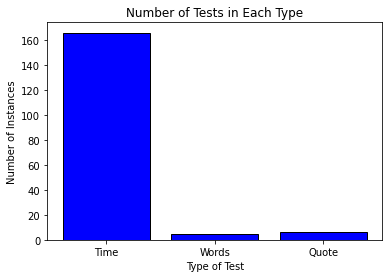

In [230]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(mt_df['mode'])
mt_df['mode'] = le.transform(mt_df['mode'])


grouped_by_type = mt_df.groupby(['mode'])
words_df = grouped_by_type.get_group(0) # 0 means words
time_df = grouped_by_type.get_group(1) # 1 means time
time_df.set_index('_id')
quote_df = grouped_by_type.get_group(2) # 2 means quote



labels = ['Time', 'Words', 'Quote']
plt.bar(labels, [len(time_df), len(words_df), len(quote_df)], facecolor="blue", edgecolor="black")
plt.title('Number of Tests in Each Type')
plt.xlabel('Type of Test')
plt.ylabel('Number of Instances')

Since there are far more time tests than words tests, and I can recall doing the words/quote categories for fun, this data I believe should not be represented when doing my hypothesis tests. Therefore, when I do my hypothesis test I should be doing it for the data only from time tests.

## Hypothesis Testing: Did my WPM Improve?

To see if my words per minute has improved over time, I will test the following hypothesis:

> Is there a difference in WPM between the last half of the timed tests I took and the first half of the timed tests I took?

**STEP 1: State the null and alternative hypothesis**

* $H_0: \mu_D \le 0$
* $H_a: \mu_D > 0$


I will use the `stats` module in `scipy` to conduct a 2-sample dependent test that is one-tailed with a level of significance $\alpha = 0.01$.

In [231]:
first_half_list = []
second_half_list = []
n = len(time_df.index)
count = 0

for index in time_df.index:
    x = time_df['wpm'][index]

    if count >= n // 2:
        second_half_list.append(x)
    else:
        first_half_list.append(x)

    count += 1


list_1 = np.array(first_half_list)
list_2 = np.array(second_half_list)


t,p = stats.ttest_rel(list_2, list_1)
print('t:', t)
print('p:', p)

t: 6.247570363958865
p: 1.7644913447111624e-08


As we can see here, the p-value is very very small. Since $p < \alpha$, we will reject the null hypothesis in favor of the alternative hypothesis. This means that there is statistical evidence provinig that my words per minute has increased across all the tests that I have taken.

## Accuracy - Super Fast + Super Correct

Accuracy is a measure of how many mistakes you made. It's measured as a percentage: the higher the percentage, the less mistakes made while typing. Here's a scatterplot showing my accuracy over all of the tests I've taken.

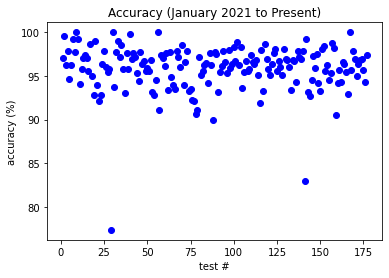

In [232]:
# code for getting my accuracy over time
plt.scatter(mt_df['_id'], mt_df['acc'], c='blue')
plt.title('Accuracy (January 2021 to Present)')
plt.xlabel('test #')
plt.ylabel('accuracy (%)')
plt.show()

Looking at this data, it seems as though my accuracy has stayed roughly the same throughout all of my tests. Putting this in a visual makes me really shocked about two things. One, I'm shocked that my accuracy has been relatively consistent since the beginning of testing myself to improve my typing. But more importantly, I'm also quite surprised as to how variable my accuracy is during any given test. Most of my tests had above 90% accuracy and I would generally say that this is alright for typing in the real world because that means that I am not correcting lots of mistakes. Overall, I would still argue that I am a pretty accurate typist. 

## Accuracy VS Incorrect Characters

MonkeyType keeps track of the number of characters you type correctly/incorrectly. As such, I thought it might be more interesting to compare accuracy with the number characters I got correct/incorrect. This way I can visualize whether I get more characters right/wrong when I get a higher/lower accuracy.

Below is code showing a scatterplot of accuracy and the number if characters I typed **incorrectly**:

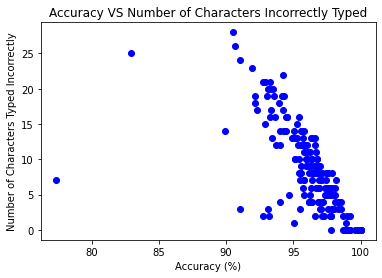

In [233]:
# code for getting my accuracy and number of characters I got wrong
plt.scatter(mt_df['acc'], mt_df['NumIncorrectChars'], c='blue')
plt.title('Accuracy VS Number of Characters Incorrectly Typed')
plt.xlabel('Accuracy (%)')
plt.ylabel('Number of Characters Typed Incorrectly')
plt.show()

And here is a scatterplot showing the number of characters I type correctly and the accuracy of those tests:

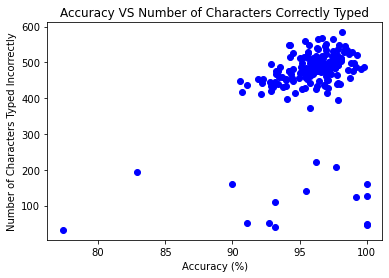

In [234]:
# code for getting my accuracy and number of characters I got right
plt.scatter(mt_df['acc'], mt_df['NumCorrectChars'], c='blue')
plt.title('Accuracy VS Number of Characters Correctly Typed')
plt.xlabel('Accuracy (%)')
plt.ylabel('Number of Characters Typed Incorrectly')
plt.show()

First let's address the outliers - some tests were taken with a shorter timeframe or were quote/word tests where I would type less total characters. However, outliers aside, there are some important takeways that I generally want to mention. 

For starters, it does appear that the higher my accuracy, the less number of characters that I type are incorrect. Looking back, this also really doesn't tell much because one would think that this makes sense. However, I still feel like this is an important visual to share because I'm not a robot that types the exact same number of characters each time - in other words there is a deviation in the number of characters that I type. This is still showing that even despite those deviations in the number of characters that I type, I still make relatively less errors with a higher accuracy. 

## Key Spacing and Key Duration - How Fast You Touchdown

Another important stat that comes with typing is key spacing and key duration. Both of these stats are measure in milliseconds and they measure the time between key presses and the time pressing an individual key in seconds. My prediction would be as my typing speed improves, my key spacing and key duration times would both decrease.

Below are plots of the average key spacing and average key durations across all of my tests:

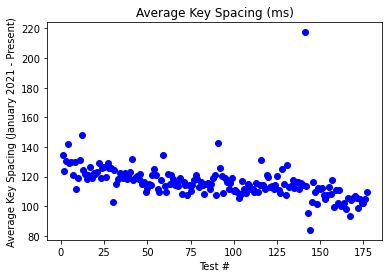

In [235]:
# code for getting my average key spacing over time
plt.scatter(mt_df['_id'], mt_df['KeySpacingAvg'], c='blue')
plt.title('Average Key Spacing (ms)')
plt.xlabel('Test #')
plt.ylabel('Average Key Spacing (January 2021 - Present)')
plt.show()

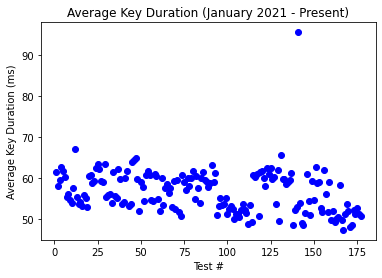

In [236]:
# code for getting my average key duration over all tests
plt.scatter(mt_df['_id'], mt_df['KeyDurationAvg'], c='blue')
plt.title('Average Key Duration (January 2021 - Present)')
plt.xlabel('Test #')
plt.ylabel('Average Key Duration (ms)')
plt.show()

What strikes me is how strong of a collelation there is between time I took my tests and my averaege key spacing. This means that the time that I spend traveling between keys has significantly decreased as I have taken more typing tests and practiced typing. The same is true for the average key duration (how long I actually press an individual key on average), however the correlation is not as strong. Since the correlation is not as strong, this would lead me to wonder if the standard deviation of key durations is a bit all over the place. A simple scatterplot later will help visualize that:

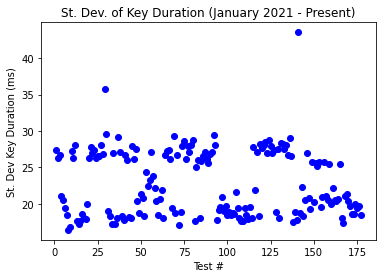

In [237]:
# scatter plot of the standard deviation of key durations for all my tests
# code for getting my average key duration over all tests
plt.scatter(mt_df['_id'], mt_df['KeyDurationSD'], c='blue')
plt.title('St. Dev. of Key Duration (January 2021 - Present)')
plt.xlabel('Test #')
plt.ylabel('St. Dev Key Duration (ms)')
plt.show()

As seen here, the standard deviations vary quite significantly, where about half the tests have a fairly high standard deviation and the other half having a fairly low standard deviation. The reason for this I believe is the type of keyboard that I use when I take the tests. Sometimes I take the test on my laptop keyboard while other times I take the test on my mechanical keyboard. Mechanical keyboard keys take much longer to press an individual key because the key switches are much larger than laptop key switches. This would explain why there is a significant difference in the variance because in my experience I find it harder to type on my mechanicaly keyboard because it takes me a minute to adjust to having to press the keys harder/longer in order for the input to register with the computer.

Since there is a smaller correlation between the time at which I took my tests and the key duration, I would like to test if my key duration has improved since I started typing. We can test the following hypothesis:

> Is the difference in average key durations between the second half of my timed tests and the first half of my timed tests positive?

Again we are going to stick with the timed tests since I was mostly just messing around on the other tests and they are not good representations of my typing progress. 

The null and alternative hypothesis are the following:

* $H_0: \mu_D \le 0$
* $H_a: \mu_D > 0$

We will use a 2-sample dependent t-test with a significance level of $\alpha = 0.01$ like before. The following Python code creates the two different lists and then computes the test statistic and the p-value using the `stats` module in `scipy`:

In [238]:
first_half_list = []
second_half_list = []
n = len(time_df.index)
count = 0

for index in time_df.index:
    x = time_df['KeyDurationAvg'][index]

    if count >= n // 2:
        second_half_list.append(x)
    else:
        first_half_list.append(x)

    count += 1


list_1 = np.array(first_half_list)
list_2 = np.array(second_half_list)


t,p = stats.ttest_rel(list_2, list_1)
print('t:', t)
print('p:', p)

t: -3.492880268183793
p: 0.0007728515593034386


Since $p < \alpha$, we can reject the null hypothesis and conclude that there still was a positive difference between the second half of my tests and the first half of my tests. Therefore, my average key duration has improved since I first started typing.

## Classification

For the classification I am going to classify what my WPM would be based off of `acc`, `keyDurationAvg`, `keySpacingAvg`, and `NumIncorrectChars`. I will first start by creating a kNN Neighbors classifier to test the 5 closest neighbors and predict a test instance that I come up with. After this, I then will compare my hold-out method kNN Neighbors and a DecisionTree Classifier to determine the accuracies of both methods and compare the results. For both of these, I will only use data for time tests.

For starters though, I cannot just outright predict a value for WPM with the tools that we have in class. As such, my classifiers will predict the range that the WPM would fall in. The ranges I will define as follows:

* < 90: slow
* 90 - 102: medium
* 102 - 110: fast

To start, I will go through and add these class descriptions to append to the time_df:

In [245]:
labels = []

for index in time_df.index:
    wpm = time_df['wpm'][index]
    
    if wpm <= 90:
        labels.append('slow')
    elif wpm > 90 and wpm <= 100:
        labels.append('medium')
    elif wpm > 100:
        labels.append('fast')

time_df['speed'] = labels
time_df.set_index('_id')

<ipython-input-245-ce01dbc97bab>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_df['speed'] = labels


,wpm,mode,acc,consistency,NumCorrectChars,NumIncorrectChars,KeySpacingAvg,KeySpacingSD,KeyDurationAvg,KeyDurationSD,restartCount,incompleteTestSeconds,timestamp,testDuration,keyConsistency,rawWpm,isPb,speed
_id,,,,,,,,,,,,,,,,,,
1,82.60,1,97.01,68.49,413,3,134.88,105.63,61.46,27.33,0,0.00,2021-01-05 03:58:13.893,60.002,23.75,85.00,1,slow
2,96.40,1,99.59,77.50,482,0,123.80,75.83,58.17,26.23,0,0.00,2021-01-05 04:01:56.171,60.003,39.16,96.40,1,medium
3,85.00,1,96.20,75.32,425,4,130.74,92.13,59.67,26.74,0,0.00,2021-01-05 04:04:28.898,60.001,30.58,87.00,0,slow
4,79.19,1,97.82,70.34,396,0,142.02,111.50,62.63,21.04,0,0.00,2021-01-12 07:11:25.369,60.011,23.59,80.19,0,slow
5,82.80,1,94.65,68.43,414,5,129.13,86.04,61.76,20.56,0,0.00,2021-01-12 07:14:52.479,60.003,34.09,86.40,0,slow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,108.95,1,96.85,83.92,545,9,104.95,56.99,52.19,18.63,2,3.04,2021-10-15 04:04:48.000,60.030,45.95,114.34,0,fast
174,110.36,1,96.94,82.15,552,9,101.89,54.78,51.35,19.92,1,0.92,2021-10-21 20:49:22.000,60.020,46.35,117.36,0,fast
175,109.38,1,95.72,82.12,547,13,102.25,55.15,52.63,19.39,0,0.00,2021-11-22 18:14:26.000,60.010,46.18,116.18,0,fast


Now we can start with my kNN classifier:

In [246]:
column = ['_id', 'wpm', 'mode', 'acc', 'consistency', 'NumCorrectChars', 'KeySpacingSD', 'KeyDurationSD', 'restartCount', 'incompleteTestSeconds', 'timestamp', 'testDuration', 'keyConsistency', 'rawWpm', 'isPb', 'speed']
X_train = time_df.drop(column, axis=1)
y_train = time_df['speed']


# normalize the data
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_normalized = scaler.transform(X_train)

X_test = [3,105,54] # 3 missed characters, 105ms average key spacing, 54ms average key duration
X_test_normalized = scaler.transform([X_test])

knn_clf = KNeighborsClassifier(n_neighbors = 5, metric='euclidean')
knn_clf.fit(X_train_normalized, y_train)
y_predicted = knn_clf.predict(X_test_normalized)
print('prediction:', y_predicted)

prediction: ['fast']


Now for the hold out method using both my kNN classifier and my Decision Tree classifier:

In [247]:
X = time_df.drop(column, axis=1)
y = time_df['speed']

# hold-out method!
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

clf = KNeighborsClassifier(n_neighbors = 5, metric='euclidean')
clf.fit(X_train, y_train)

y_predicted = clf.predict(X_test)
print('Neighbors Classifier:')
print(y_predicted)

Neighbors Classifier:
['medium' 'slow' 'medium' 'fast' 'medium' 'fast' 'medium' 'medium'
 'medium' 'fast' 'fast' 'medium' 'medium' 'medium' 'medium' 'fast' 'slow'
 'slow' 'medium' 'medium' 'fast' 'slow' 'medium' 'slow' 'medium' 'fast'
 'medium' 'medium' 'slow' 'medium' 'medium' 'medium' 'medium' 'fast'
 'medium' 'medium' 'medium' 'slow' 'medium' 'medium' 'fast' 'slow']


In [248]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)
y_predicted_tree = tree_clf.predict(X_test)
print('Decision Tree Classifier:')
print(y_predicted_tree)

DecisionTree Classifier:
['fast' 'slow' 'fast' 'medium' 'slow' 'fast' 'medium' 'medium' 'medium'
 'fast' 'fast' 'slow' 'medium' 'medium' 'medium' 'fast' 'slow' 'fast'
 'medium' 'medium' 'fast' 'slow' 'medium' 'slow' 'medium' 'fast' 'medium'
 'medium' 'slow' 'medium' 'medium' 'fast' 'medium' 'medium' 'medium'
 'medium' 'fast' 'fast' 'medium' 'fast' 'fast' 'slow']


### Results

We can compute and print the accuracy of each classifier using the `score` method:

In [249]:
accuracy_knn = clf.score(X_test, y_test)
accuracy_tree = tree_clf.score(X_test, y_test)
print('kNN 5 neighbors accuracy:', accuracy_knn)
print('Decision Tree accuracy:', accuracy_tree)

kNN 5 neighbors accuracy: 0.6904761904761905
Decision Tree accuracy: 0.8571428571428571


Based on the above, we see that the kNN 5 neighbors classifier was approximately 69% accurate and the decision tree classifier was approximately 80% accurate. Therefore, the decision tree seems to be significantly more accurate than the kNN classifier. 

## Conclusion


### Summary

The dataset that I chose to analyze was data from typing tests that I took on [MonkeyType](https://monkeytype.com/). The biggest challenge was figuring out how I wanted to use a classifier to predict words per minute. All of my applicable data was numeric except for the type of test. However, the type of test was dominated by one type so it didn't seem like it would make for a good classifier if there wasn't enough data to train on the other types. The classifiers I ended up choosing were `NumIncorrectChars`, `KeyDurationAvg`, and `KeySpacingAvg`. I chose these because I noticed that these values had correlations to how fast I was typing. In other words, there were visual correlations between these and my WPM. The data however might have still been slightly biased because I improved pretty quickly with my WPM and in the more recent tests have gotten many scores within the 95-112WPM range. I could have improved this classifier by making the ranges smaller so that the training data was spread out across more intervals. I could also try different methods with my kNN classifier that would have caused more accurate results like k-fold cross validation.



### Ethics

While typing data isn't very threatening, I noticed some practices by the website developers that made me pretty scared. For starters, there was no easy way for someone who didn't know anything about computer science to download their data. Sure there was a nice data view under your profile, but the ability to look at all your data since you started testing was not possible. Additionally, the developers weren't even able to tell me some of the attributes that they were collecting on their users. Both of these practices scdare me. If bigger companies that are managing the data of real people are violating this, then I would be nervous. People should have the right to be able to look at their data, and if companies hide this from them and forget the data that they are even collecting, that disregards the humanity of the people that they are collecting data off of and communicates that they do not value the human lives of the data being collected. 